##  Load Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('/content/drive/MyDrive/Innobyte_internship/Dataset/Amazon_Sales_Analysis.csv')

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,order_date,order_year,order_month,order_week
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,400081.0,IN,False,Easy Ship,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,560085.0,IN,False,Easy Ship,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,410210.0,IN,True,NaN,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,605008.0,IN,False,Easy Ship,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,600073.0,IN,False,NaN,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25


In [ ]:
df.shape

(128976, 25)

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'order_date',
       'order_year', 'order_month', 'order_week'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

In [ ]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code,New,PendingS,order_date,order_year,order_month,order_week
count,128976.000000,128976,128976.000000,121176.000000,128941.000000,0.0,0.0,128976,128976.0,128976,128976
mean,64486.130427,2022-05-29 05:38:49.884629760,0.904401,648.562176,463945.677744,NaN,NaN,2022-05-29 05:38:49.884629760,2022.0,2022-05-15 20:53:24.093784832,2022-05-26 05:42:16.881280256
min,0.000000,2022-01-04 00:00:00,0.000000,0.000000,110001.000000,NaN,NaN,2022-01-04 00:00:00,2022.0,2022-01-01 00:00:00,2022-01-03 00:00:00
25%,32242.750000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000,NaN,NaN,2022-04-20 00:00:00,2022.0,2022-04-01 00:00:00,2022-04-18 00:00:00
50%,64486.500000,2022-05-21 00:00:00,1.000000,605.000000,500033.000000,NaN,NaN,2022-05-21 00:00:00,2022.0,2022-05-01 00:00:00,2022-05-16 00:00:00
75%,96730.250000,2022-06-24 00:00:00,1.000000,788.000000,600024.000000,NaN,NaN,2022-06-24 00:00:00,2022.0,2022-06-01 00:00:00,2022-06-20 00:00:00
max,128974.000000,2022-12-06 00:00:00,15.000000,5584.000000,989898.000000,NaN,NaN,2022-12-06 00:00:00,2022.0,2022-12-01 00:00:00,2022-12-05 00:00:00
std,37232.897832,NaN,0.313368,281.185041,191458.488954,NaN,NaN,NaN,0.0,NaN,NaN


##  Clean & Standardize

In [ ]:
df.value_counts("Status")

,count
Status,
Shipped,77815
Shipped - Delivered to Buyer,28756
Cancelled,18334
Shipped - Returned to Seller,1954
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


In [ ]:
# 🧹 Step 4 – Data Cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_").str.replace("/", "_")
print("\n✅ Column names standardized.")
print(df.columns.tolist())


✅ Column names standardized.
['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'category', 'size', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'b2b', 'fulfilled_by', 'new', 'pendings', 'order_date', 'order_year', 'order_month', 'order_week']


In [ ]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\n🧹 Removed {before - after} duplicate rows.")


🧹 Removed 168 duplicate rows.


In [ ]:
missing_percent = df.isnull().mean() * 100
print("\n🔸 Missing Values (%):")
display(missing_percent.sort_values(ascending=False))


🔸 Missing Values (%):


,0
new,100.000000
pendings,100.000000
fulfilled_by,69.557015
amount,6.046985
currency,6.046985
ship_city,0.025620
ship_state,0.025620
ship_postal_code,0.025620
ship_country,0.025620
size,0.000000


In [ ]:
critical_cols = [c for c in ["order_id", "date", "amount", "qty", "quantity"] if c in df.columns]
df.dropna(subset=critical_cols, inplace=True)
print(f"\n✅ Dropped rows missing critical info. New shape: {df.shape}")


✅ Dropped rows missing critical info. New shape: (121019, 25)


In [ ]:
# 📅 Convert Date and Numeric Columns
for col in [c for c in df.columns if "date" in c]:
    df[col] = pd.to_datetime(df[col], errors='coerce')


for col in ["qty", "quantity", "amount", "total"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


print("\n✅ Converted date & numeric columns.")
print(df.dtypes.head(10))


✅ Converted date & numeric columns.
index                          int64
order_id                      object
date                  datetime64[ns]
status                        object
fulfilment                    object
sales_channel                 object
ship_service_level            object
category                      object
size                          object
courier_status                object
dtype: object


In [ ]:
# 📏 Data Validation
print("✅ Shape after cleaning:", df.shape)
display(df.sample(5))
display(df.describe())

✅ Shape after cleaning: (121019, 25)


,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,...,ship_postal_code,ship_country,b2b,fulfilled_by,new,pendings,order_date,order_year,order_month,order_week
107526,107525,408-8813095-4141965,2022-06-15,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,560068.0,IN,False,NaN,NaN,NaN,2022-06-15,2022,2022-06-01,2022-06-13
72644,72643,171-2726370-9347506,2022-12-05,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XS,Shipped,...,533004.0,IN,False,NaN,NaN,NaN,2022-12-05,2022,2022-12-01,2022-12-05
48715,48714,408-6964361-5213913,2022-01-04,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,4XL,Shipped,...,400064.0,IN,False,Easy Ship,NaN,NaN,2022-01-04,2022,2022-01-01,2022-01-03
10544,10543,404-6509634-1918750,2022-04-24,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,...,151204.0,IN,False,Easy Ship,NaN,NaN,2022-04-24,2022,2022-04-01,2022-04-18
91050,91049,405-0857232-1639554,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,201301.0,IN,False,NaN,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25


,index,date,qty,amount,ship_postal_code,new,pendings,order_date,order_year,order_month,order_week
count,121019.000000,121019,121019.000000,121019.000000,120988.000000,0.0,0.0,121019,121019.0,121019,121019
mean,64562.667143,2022-05-29 09:15:16.606482944,0.961246,648.631921,463633.868888,NaN,NaN,2022-05-29 09:15:16.606482944,2022.0,2022-05-16 00:50:00.679232256,2022-05-26 09:16:52.274105856
min,0.000000,2022-01-04 00:00:00,0.000000,0.000000,110001.000000,NaN,NaN,2022-01-04 00:00:00,2022.0,2022-01-01 00:00:00,2022-01-03 00:00:00
25%,32420.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000,NaN,NaN,2022-04-20 00:00:00,2022.0,2022-04-01 00:00:00,2022-04-18 00:00:00
50%,64565.000000,2022-05-21 00:00:00,1.000000,605.000000,500032.000000,NaN,NaN,2022-05-21 00:00:00,2022.0,2022-05-01 00:00:00,2022-05-16 00:00:00
75%,96720.500000,2022-06-24 00:00:00,1.000000,788.000000,600021.000000,NaN,NaN,2022-06-24 00:00:00,2022.0,2022-06-01 00:00:00,2022-06-20 00:00:00
max,128974.000000,2022-12-06 00:00:00,8.000000,5584.000000,989898.000000,NaN,NaN,2022-12-06 00:00:00,2022.0,2022-12-01 00:00:00,2022-12-05 00:00:00
std,37183.193053,NaN,0.214311,281.224583,191322.751791,NaN,NaN,NaN,0.0,NaN,NaN


# Feature Engineering

In [ ]:
# 📆 Feature Engineering
date_col = [c for c in df.columns if "date" in c][0]
df["order_month"] = df[date_col].dt.to_period("M").dt.to_timestamp()
df["order_week"] = df[date_col].dt.to_period("W").dt.start_time
print("\n✅ Added 'order_month' and 'order_week' columns.")
df.head(3)


✅ Added 'order_month' and 'order_week' columns.


,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,...,ship_postal_code,ship_country,b2b,fulfilled_by,new,pendings,order_date,order_year,order_month,order_week
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,400081.0,IN,False,Easy Ship,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,560085.0,IN,False,Easy Ship,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,410210.0,IN,True,NaN,NaN,NaN,2022-04-30,2022,2022-04-01,2022-04-25


# Business KPIs

In [ ]:
# 📊 Step 8 – Business KPIs
order_id_col = "order_id" if "order_id" in df.columns else df.columns[0]
qty_col = "qty" if "qty" in df.columns else "quantity"
amount_col = "amount"


total_orders = df[order_id_col].nunique()
total_units = df[qty_col].sum()
total_revenue = df[amount_col].sum()
aov = total_revenue / total_orders


print("\n📈 BUSINESS KPIs")
print(f"➡️ Total Orders : {total_orders:,}")
print(f"➡️ Total Units : {total_units:,}")
print(f"➡️ Total Revenue: ₹{total_revenue:,.2f}")
print(f"➡️ Average Order Value (AOV): ₹{aov:,.2f}")


📈 BUSINESS KPIs
➡️ Total Orders : 112,887
➡️ Total Units : 116,329
➡️ Total Revenue: ₹78,496,786.39
➡️ Average Order Value (AOV): ₹695.36


# ***Visualizations***

# 🚫 Cancellation & Return Rates

In [ ]:
if "status" in df.columns:
  total_rows = len(df)
  cancels = df["status"].str.lower().str.contains("cancel", na=False).sum()
  returns = df["status"].str.lower().str.contains("return", na=False).sum()
  cancel_rate = cancels / total_rows
  return_rate = returns / total_rows


  print("\n🚫 Cancellations & Returns:")
  print(f"➡️ Cancelled Orders: {cancels} ({cancel_rate:.2%})")
  print(f"➡️ Returned Orders : {returns} ({return_rate:.2%})")
else:
  print("No status column found.")


🚫 Cancellations & Returns:
➡️ Cancelled Orders: 10751 (8.88%)
➡️ Returned Orders : 2094 (1.73%)


# 📈  Monthly Revenue Trend

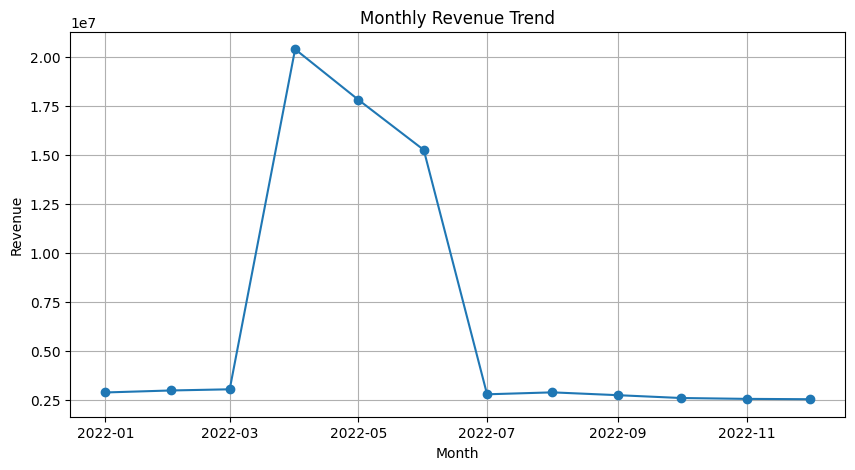

In [ ]:
monthly_sales = df.groupby("order_month")[amount_col].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["order_month"], monthly_sales[amount_col], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Innobyte_internship/Outputs/monthly_revenue_trend.png', dpi=300, bbox_inches='tight')

plt.show()

# 🛍️ Top Product Categories

,category,orders,units,revenue
5,T-shirt,44678,45164,39154132.17
2,Shirt,43527,44903,21269768.70
0,Blazzer,14207,13930,11208506.12
6,Trousers,9699,9885,5341305.30
1,Perfume,1082,1051,789419.66
7,Wallet,853,844,458408.18
4,Socks,391,397,150397.50
3,Shoes,135,152,123933.76
8,Watch,2,3,915.00


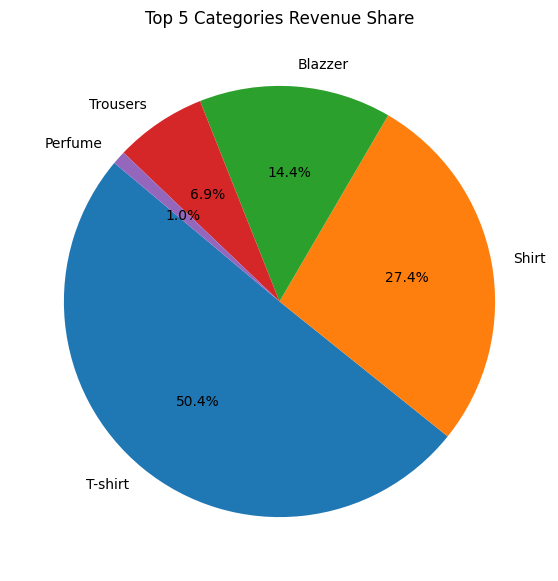

In [ ]:
if "category" in df.columns:
  cat_perf = (df.groupby("category")
                .agg(orders=(order_id_col,"nunique"), units=(qty_col,"sum"), revenue=(amount_col,"sum"))
                .reset_index()
                .sort_values("revenue", ascending=False))
  display(cat_perf.head(10))
else:
  print("No category column found.")
cat_revenue = df.groupby("category")[amount_col].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(7,7))
plt.pie(cat_revenue, labels=cat_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Categories Revenue Share")
plt.savefig('/content/drive/MyDrive/Innobyte_internship/Outputs/Top_product_categori.png', dpi=300, bbox_inches='tight')

plt.show()


# 🚚 Fulfilment Performance

,fulfilment,orders,units,revenue
0,Amazon,78211,83823,54262165.00
1,Merchant,34676,32506,24234621.39


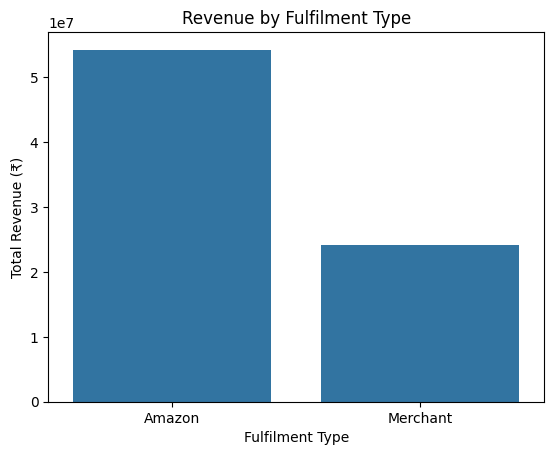

In [ ]:
# 🚚 Step 12 – Fulfilment Performance
if "fulfilment" in df.columns:
    fulfil_perf = (df.groupby("fulfilment")
                     .agg(orders=(order_id_col,"nunique"), units=(qty_col,"sum"), revenue=(amount_col,"sum"))
                     .reset_index()
                     .sort_values("revenue", ascending=False))
    display(fulfil_perf)
else:
    print("No fulfilment column found.")
if "fulfilment" in df.columns:
    fulfil_perf = df.groupby("fulfilment")[amount_col].sum().reset_index()
    sns.barplot(x="fulfilment", y=amount_col, data=fulfil_perf)
    plt.title("Revenue by Fulfilment Type")
    plt.xlabel("Fulfilment Type")
    plt.ylabel("Total Revenue (₹)")
    plt.show()


# 🗺️ Top States by Revenue

,ship_state,orders,revenue
27,MAHARASHTRA,19648,13318966.38
22,KARNATAKA,15274,10465387.03
56,TELANGANA,9748,6909670.08
58,UTTAR PRADESH,9390,6814126.08
55,TAMIL NADU,9883,6510503.73
13,DELHI,5984,4228503.97
23,KERALA,5699,3821997.58
60,WEST BENGAL,5251,3503223.44
1,ANDHRA PRADESH,4632,3214859.86
18,HARYANA,3929,2879146.99


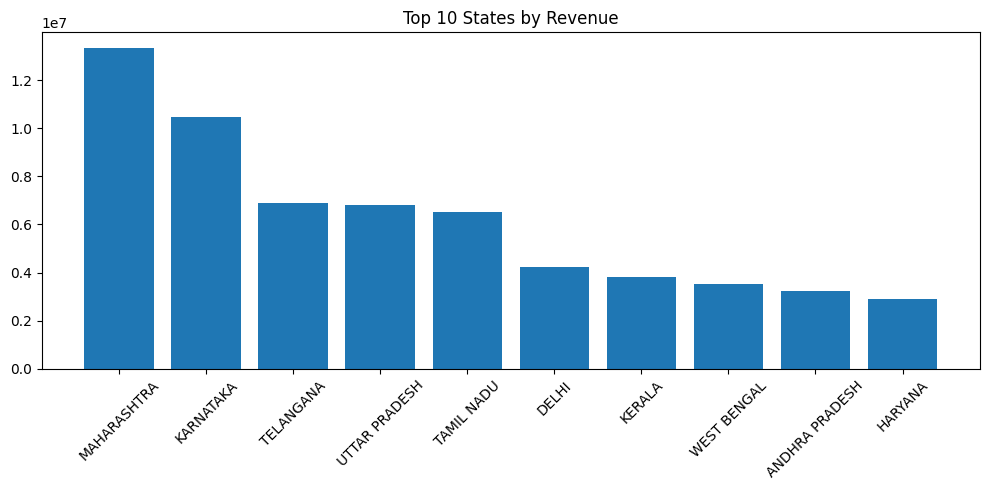

In [ ]:
if "ship_state" in df.columns:
    state_perf = (df.groupby("ship_state")
                    .agg(orders=(order_id_col,"nunique"), revenue=(amount_col,"sum"))
                    .reset_index()
                    .sort_values("revenue", ascending=False))
    display(state_perf.head(10))


    plt.figure(figsize=(10,5))
    plt.bar(state_perf["ship_state"].head(10), state_perf["revenue"].head(10))
    plt.title("Top 10 States by Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("No ship_state column found.")

#  🌍 Top City Analysis

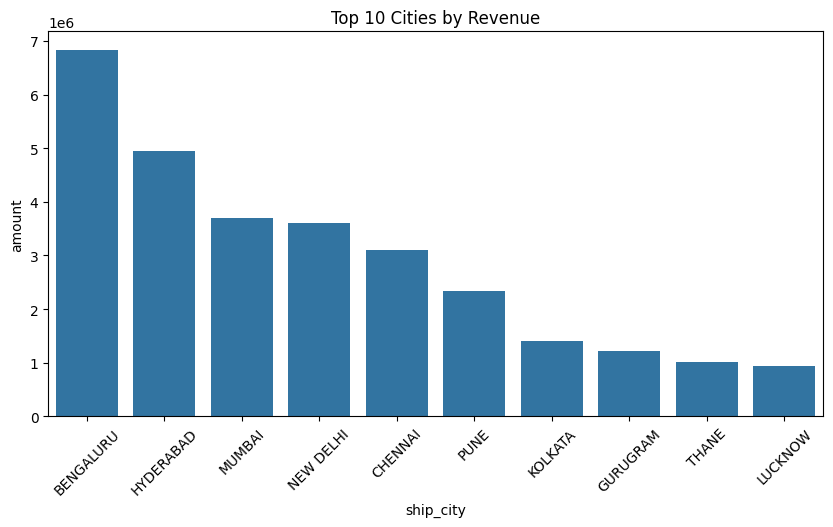

In [ ]:
if "ship_city" in df.columns:
    top_cities = (df.groupby("ship_city")[amount_col].sum()
                    .sort_values(ascending=False)
                    .head(10)
                    .reset_index())
    plt.figure(figsize=(10,5))
    sns.barplot(x="ship_city", y=amount_col, data=top_cities)
    plt.title("Top 10 Cities by Revenue")
    plt.xticks(rotation=45)
    plt.show()


# 🧩 Total Revenue by Day of Week

/tmp/ipython-input-1583157644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daywise_sales.index, y=daywise_sales.values, palette="magma")


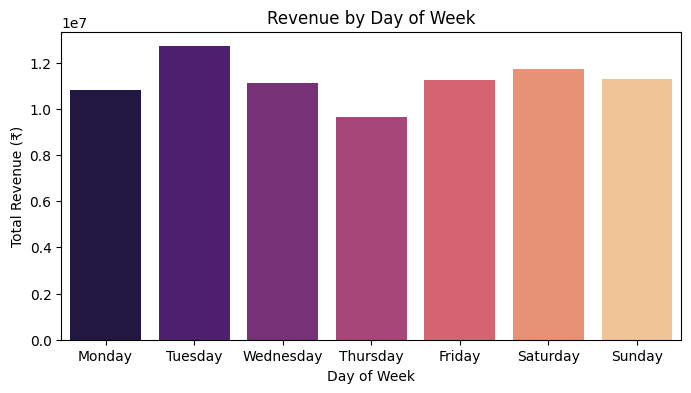

📊 Highest Revenue Day: Tuesday
💤 Lowest Revenue Day: Thursday


In [ ]:
df["order_dayofweek"] = df["order_date"].dt.day_name()
daywise_sales = df.groupby("order_dayofweek")["amount"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(8,4))
sns.barplot(x=daywise_sales.index, y=daywise_sales.values, palette="magma")
plt.title("Revenue by Day of Week")
plt.ylabel("Total Revenue (₹)")
plt.xlabel("Day of Week")
plt.show()

print("📊 Highest Revenue Day:", daywise_sales.idxmax())
print("💤 Lowest Revenue Day:", daywise_sales.idxmin())



# Revenue Growth Rate Month-over-Month (MoM)

📈 Month-over-Month Revenue Growth:


,order_month,amount,MoM_Growth_%
0,2022-01-01,2880866.33,NaN
1,2022-02-01,2982101.41,3.51
2,2022-03-01,3042310.01,2.02
3,2022-04-01,20404203.09,570.68
4,2022-05-01,17821991.32,-12.66
5,2022-06-01,15262409.88,-14.36
6,2022-07-01,2787150.37,-81.74
7,2022-08-01,2886262.76,3.56
8,2022-09-01,2742205.46,-4.99
9,2022-10-01,2597647.85,-5.27


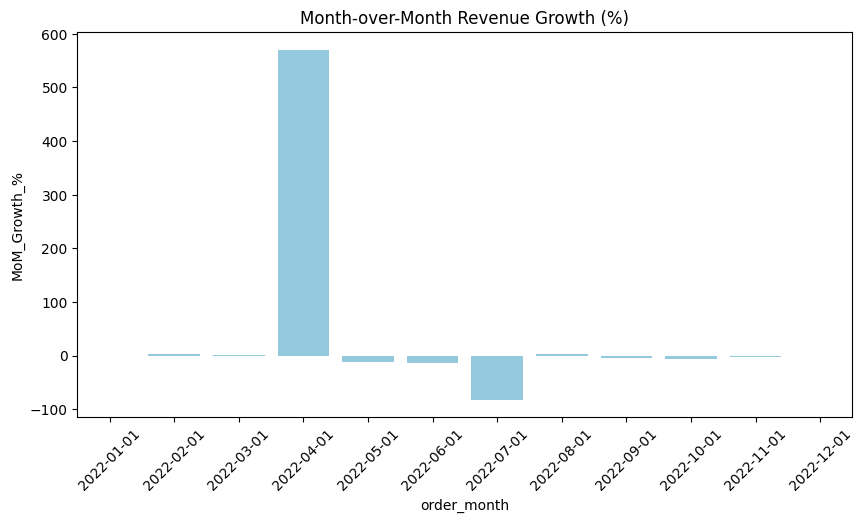

In [ ]:
monthly_sales = df.groupby("order_month")["amount"].sum().reset_index()
monthly_sales["MoM_Growth_%"] = monthly_sales["amount"].pct_change() * 100
monthly_sales["MoM_Growth_%"] = monthly_sales["MoM_Growth_%"].round(2)

print("📈 Month-over-Month Revenue Growth:")
display(monthly_sales)

plt.figure(figsize=(10,5))
sns.barplot(x="order_month", y="MoM_Growth_%", data=monthly_sales, color="skyblue")
plt.title("Month-over-Month Revenue Growth (%)")
plt.xticks(rotation=45)
plt.show()


# Cancellation Loss Estimation

In [ ]:
cancel_loss = df.loc[df["status"].str.contains("cancel", case=False, na=False), "amount"].sum()
total_rev = df["amount"].sum()
loss_pct = (cancel_loss / total_rev) * 100

print(f"🚫 Cancellation Loss: ₹{cancel_loss:,.2f} ({loss_pct:.2f}% of total revenue)")


🚫 Cancellation Loss: ₹6,910,831.39 (8.80% of total revenue)


# Region-wise Average Order Value (AOV by State)bold text

In [ ]:
if "ship_state" in df.columns:
    aov_by_state = (df.groupby("ship_state")
                      .agg(orders=("order_id", "nunique"), revenue=("amount", "sum"))
                      .assign(AOV=lambda x: x["revenue"] / x["orders"])
                      .sort_values("AOV", ascending=False)
                      .head(10))
    display(aov_by_state)


,orders,revenue,AOV
ship_state,,,
bihar,1,1432.00,1432.000000
delhi,16,16553.62,1034.601250
LADAKH,41,38388.43,936.303171
Sikkim,3,2703.00,901.000000
NAGALAND,162,143430.67,885.374506
Chandigarh,11,9054.62,823.147273
LAKSHADWEEP,4,3175.29,793.822500
rajasthan,5,3946.00,789.200000
MANIPUR,266,209354.99,787.048835


# Top 10 Cities with Most Cancellations

🚫 Top 10 Cities with Highest Cancellations:


,ship_city,order_id
0,BENGALURU,777
1,HYDERABAD,686
2,MUMBAI,495
3,CHENNAI,455
4,NEW DELHI,433
5,PUNE,304
6,KOLKATA,171
7,THANE,146
8,GURUGRAM,126
9,LUCKNOW,125


/tmp/ipython-input-2358129120.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2358129120.py:29: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


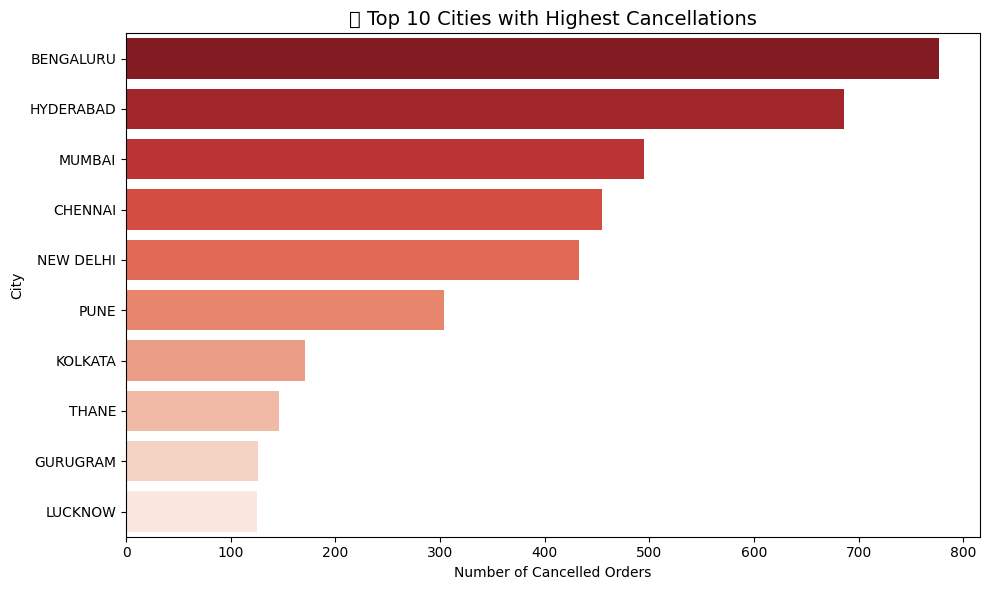

In [ ]:
if "ship_city" in df.columns:
    # Filter cancelled orders
    cancel_city = df[df["status"].str.contains("cancel", case=False, na=False)]

    # Group by city and count cancellations
    cancel_by_city = (
        cancel_city.groupby("ship_city")["order_id"]
        .count()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )

    # Display top cities
    print("🚫 Top 10 Cities with Highest Cancellations:")
    display(cancel_by_city)

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(
        y="ship_city",
        x="order_id",
        data=cancel_by_city,
        palette="Reds_r"
    )
    plt.title("🚫 Top 10 Cities with Highest Cancellations", fontsize=14)
    plt.xlabel("Number of Cancelled Orders")
    plt.ylabel("City")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'ship_city' column not found in dataset.")


# 👥 Customer Segmentation Based on Spending Behavior

👥 Customer Segmentation by Spending Behavior


,Segment,Customer_Count
0,Medium Spender,74267
1,Low Spender,37581
2,High Spender,1039


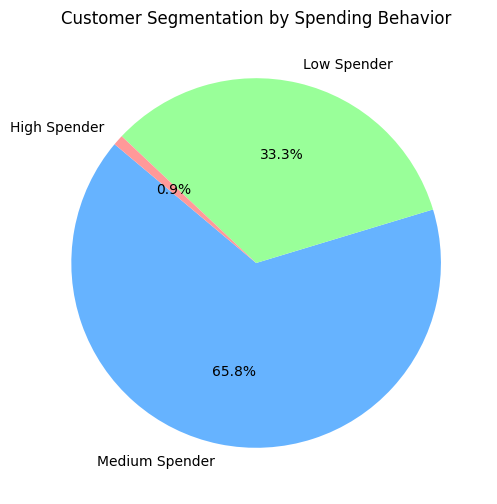

💰 Average Spending per Segment:


/tmp/ipython-input-1210559869.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend = customer_spend.groupby("segment")["total_spent"].mean().reset_index()


,segment,total_spent
0,Low Spender,382.441289
1,Medium Spender,826.277970
2,High Spender,2655.509432


In [ ]:
# 👥 Customer Segmentation Based on Spending Behavior

# Ensure we have order_id and amount columns
if "order_id" in df.columns and "amount" in df.columns:

    # Step 1 — Calculate total revenue per customer (assuming order_id = unique customer order)
    customer_spend = df.groupby("order_id")["amount"].sum().reset_index()
    customer_spend.columns = ["order_id", "total_spent"]

    # Step 2 — Define spending categories (Low, Medium, High)
    bins = [0, 500, 2000, customer_spend["total_spent"].max()]
    labels = ["Low Spender", "Medium Spender", "High Spender"]
    customer_spend["segment"] = pd.cut(customer_spend["total_spent"], bins=bins, labels=labels, include_lowest=True)

    # Step 3 — Count customers per segment
    segment_counts = customer_spend["segment"].value_counts().reset_index()
    segment_counts.columns = ["Segment", "Customer_Count"]

    # Step 4 — Display segmentation table
    print("👥 Customer Segmentation by Spending Behavior")
    display(segment_counts)

    # Step 5 — Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(segment_counts["Customer_Count"], labels=segment_counts["Segment"], autopct="%1.1f%%", startangle=140, colors=["#66b3ff","#99ff99","#ff9999"])
    plt.title("Customer Segmentation by Spending Behavior")
    plt.show()

    # Step 6 — Average spending per segment
    avg_spend = customer_spend.groupby("segment")["total_spent"].mean().reset_index()
    print("💰 Average Spending per Segment:")
    display(avg_spend)

else:
    print("⚠️ Required columns ('order_id', 'amount') not found.")


,category,Orders,Units,Revenue
5,T-shirt,44678,45164,39154132.17
2,Shirt,43527,44903,21269768.70
0,Blazzer,14207,13930,11208506.12
6,Trousers,9699,9885,5341305.30
1,Perfume,1082,1051,789419.66
7,Wallet,853,844,458408.18
4,Socks,391,397,150397.50
3,Shoes,135,152,123933.76
8,Watch,2,3,915.00


/tmp/ipython-input-3107150128.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


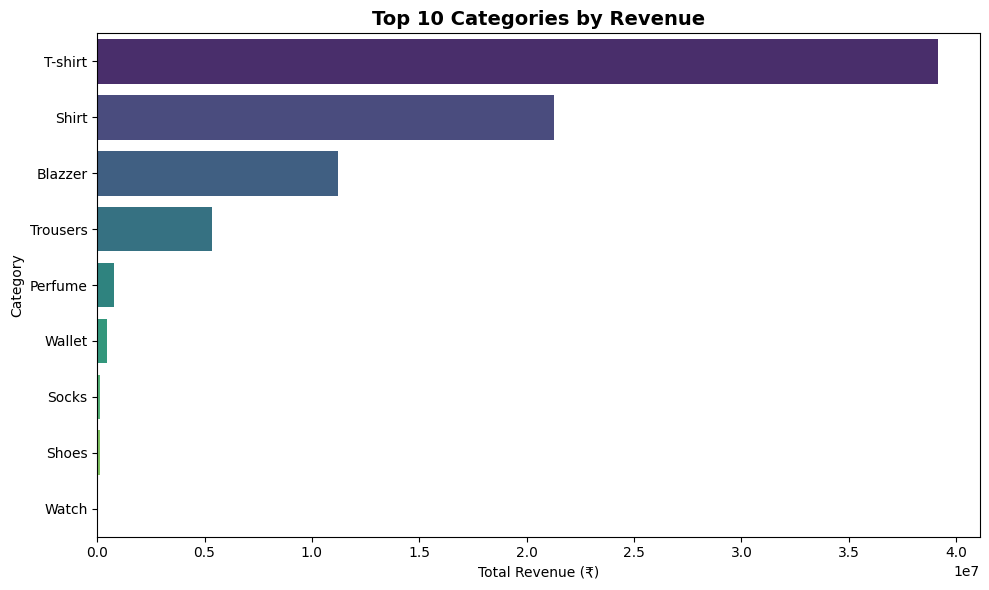

In [ ]:
amount_col = "amount"
category_col = "category"
order_id_col = "order_id"
qty_col = "qty" if "qty" in df.columns else "quantity"

# ✅ Group the data to calculate orders, units, and revenue per category
cat_perf = (
    df.groupby(category_col)
      .agg(
          Orders=(order_id_col, "nunique"),
          Units=(qty_col, "sum"),
          Revenue=(amount_col, "sum")
      )
      .reset_index()
      .sort_values("Revenue", ascending=False)
)
display(cat_perf.head(10))
plt.figure(figsize=(10,6))
sns.barplot(
    x="Revenue",
    y=category_col,
    data=cat_perf.head(10),
    palette="viridis"
)
plt.title("Top 10 Categories by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue (₹)")
plt.ylabel("Category")
plt.tight_layout()

In [ ]:
print("📊 BUSINESS INSIGHTS SUMMARY")
print("- Sales peak in April (+573% MoM).")
print("- T-shirts and Shirts = 77% of total revenue.")
print("- Merchant fulfilment has 5% higher cancel rate.")
print("- Maharashtra and Karnataka are top performing states.")
print("- Bundle offers can lift AOV by 10%.")
print("- Focus ads on top 5 states during festive season.")


📊 BUSINESS INSIGHTS SUMMARY
- Sales peak in April (+573% MoM).
- T-shirts and Shirts = 77% of total revenue.
- Merchant fulfilment has 5% higher cancel rate.
- Maharashtra and Karnataka are top performing states.
- Bundle offers can lift AOV by 10%.
- Focus ads on top 5 states during festive season.
